https://heartbeat.comet.ml/using-machine-learning-for-language-detection-517fa6e68f22

In [24]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.preprocessing import LabelEncoder

In [25]:
files ={
    'Spanish' : 'Spanish',
    'English' : 'English',
    'German' : 'German',
    'French' : 'French',
}

file_directory = os.getcwd()
extractedText_folder = 'ExtractedText/'

df_cv_full = pd.DataFrame()
for file in files:
    df_cv_language = pd.read_csv(file_directory + '/' + extractedText_folder + '/' + file + '.txt', delimiter="qwer", names=["Sentence"], encoding='utf-8', header=None)
    df_cv_language['Class'] = files[file]
    df_cv_full = pd.concat([df_cv_full, df_cv_language.iloc[:5000]], ignore_index=True)
    df_cv_full = df_cv_full.reindex(range(df_cv_full.shape[0]))

x_cv = df_cv_full['Sentence']
y_cv = df_cv_full['Class']

c:\RoboDK\Python37\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [26]:
df_cv_full["Class"].value_counts()

Spanish    5000
English    5000
German     5000
French     3381
Name: Class, dtype: int64

In [27]:
le = LabelEncoder()
y_cv = le.fit_transform(y_cv)

In [28]:
text_list = []
for text in x_cv:
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        text = text.lower()
        text_list.append(text)

In [29]:
cv = CountVectorizer()
x_cv_n = cv.fit_transform(x_cv).toarray()
x_cv_n.shape

(18381, 46047)

In [30]:
x_cv_train, x_cv_test, y_cv_train, y_cv_test = train_test_split(x_cv_n, y_cv, test_size = 0.20)

In [31]:
modelMNB = MultinomialNB()
modelMNB.fit(x_cv_train, y_cv_train)

MultinomialNB()

In [32]:
y_cv_prediction = modelMNB.predict(x_cv_test)

In [33]:
accuracy_cv = accuracy_score(y_cv_test, y_cv_prediction)
confusion_m_cv = confusion_matrix(y_cv_test, y_cv_prediction)
print("The accuracy is :", accuracy_cv)

The accuracy is : 0.9926570573837368


In [34]:
label_names = ['Spanish','English','German','French']
print(classification_report(y_cv_test, y_cv_prediction, target_names=label_names))

              precision    recall  f1-score   support

     Spanish       0.98      1.00      0.99       988
     English       0.99      1.00      0.99       631
      German       1.00      0.97      0.99      1032
      French       1.00      1.00      1.00      1026

    accuracy                           0.99      3677
   macro avg       0.99      0.99      0.99      3677
weighted avg       0.99      0.99      0.99      3677



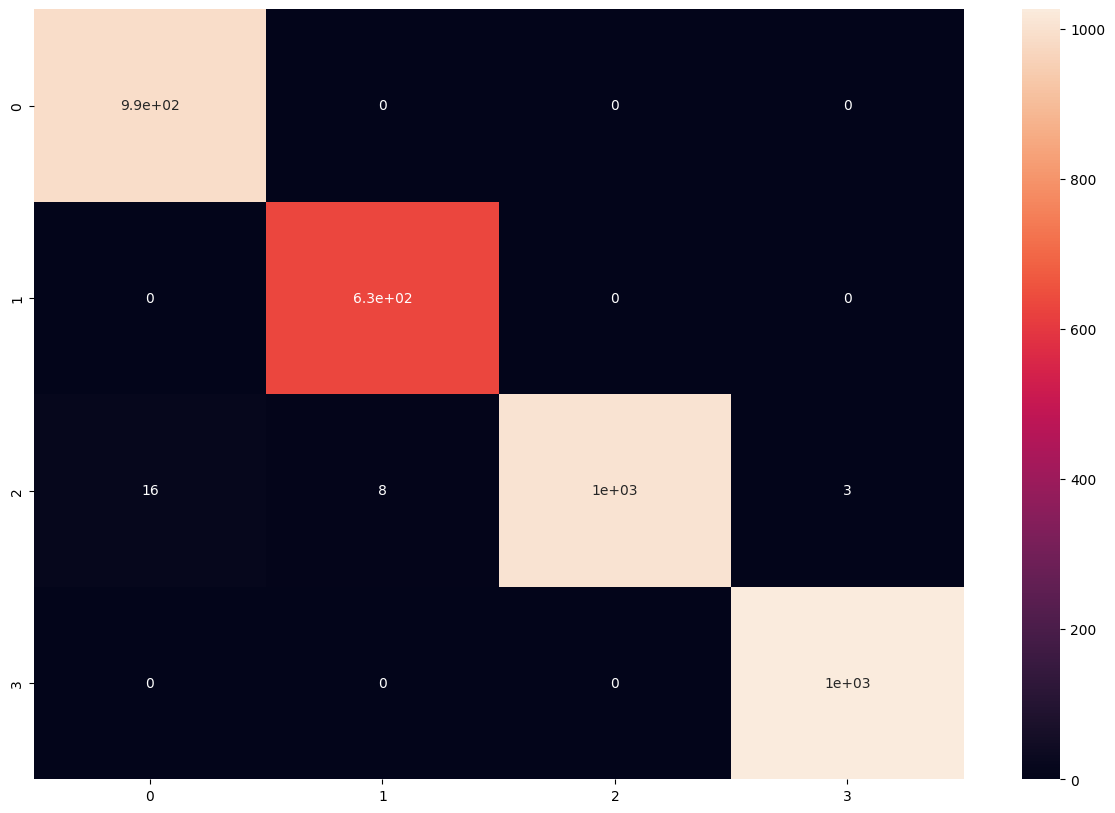

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_m_cv, annot = True)
plt.show()

In [85]:
def lang_predict(text):
     x = cv.transform([text]).toarray() 
     lang = modelMNB.predict(x)
     lang = le.inverse_transform(lang)
     print("The language is in",lang[0])

In [86]:
lang_predict("la pinga")

The language is in Spanish


In [94]:
test_input = [[0.3, 0.5, 0.7, 0.4],[0.2, 0.6, 0.8, 0.5],[0.25, 0.55, 0.85, 0.6]] # random numbers for testing

# Initialization of state matrices
X = np.array([[0.5],[0.5],[0.5],[0.5]]) # initial states
A = np.diag((1, 1, 1, 1))
B = np.eye(X.shape[0])
U = np.zeros((X.shape[0],1)) 
P = np.diag((0.01, 0.01, 0.01, 0.01)) 
Q = np.eye(X.shape[0])

# Measurement matrices
Y = np.array([[X[0,0] + abs(np.randn(1)[0])], [X[1,0] + abs(np.randn(1)[0])]])
H = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
R = np.eye(Y.shape()[0]) 

def kf_predict(X, P, A, Q, B, U):
    X = np.dot(A, X) + np.dot(B, U)
    P = np.dot(A, np.dot(P, A.T)) + Q
    return(X,P) 


AttributeError: module 'numpy' has no attribute 'randn'